<table width="100%" border="3">
  <tbody>
    <tr>
      <td ><img src="https://aidea-web.tw/images/web/logo_white.png" alt="Aidea" width="400"/></td>
      <td align='left'><h1>Exercise 1: Introduction to AIdea AOI </h1></td>
    </tr>
  </tbody>
</table>


# AIdea AOI 實作課程, 2020
* 這個教程使用工研院AIdea人工智慧共創平台的AOI資料集做為練習的標的。
* 介紹撰寫深度學習的程式來進行自動光學檢查的瑕疵分類。
* 此notebook程式可以在雲端使用Google Colab或使用個人電腦上的Jupyter執行。

AIdea人工智慧共創平台
https://aidea-web.tw/topic/a49e3f76-69c9-4a4a-bcfc-c882840b3f27

亞洲大學 朱學亭老師  EMAIL: htchu.taiwan@gmail.com  FB: https://www.facebook.com/htchu.taiwan


# (A) AIdea dataset


## Step 1: Load the AIdea AOI dataset from google drive

In [2]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='1N70KyhVsQZU2iiK19xlJubw0afQ2EMu5',dest_path='./content', unzip=True)

Unzipping...Done.


## Step 2: read the training set

In [4]:
import pandas as pd
df_train = pd.read_csv("train.csv")
print(df_train.shape)

(2528, 2)


In [5]:
df_train.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


## Step 3: Build the lists of training images and labels from the dataframe

In [6]:
#limit the amount of training images for the class process
#train_num = 480
train_num = df_train.shape[0]
if train_num >= df_train.shape[0]:
  train_num = df_train.shape[0]
train_files = df_train.iloc[:train_num,0].values
train_labels = df_train.iloc[:train_num,1].values
print(train_labels[:10])

[0 1 1 5 5 5 3 0 3 5]


## Step 4: read images of the training set

In [7]:
train_path ="train_images/"
train_images = []
from tensorflow.keras.preprocessing import image
for file in train_files:
    img = image.load_img(train_path+file, color_mode="rgb", target_size = (299, 299))
    train_images.append(img)
    if len(train_images)%100 == 0:
      print('.', end='')
print(len(train_images))

.........................2528


## Step 5: show AOI images of the classes: 
0 (normal), 1 (void), 2 (horizontal  defect) 3 (vertical defect), 4 (edge defect), 5 (particle)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

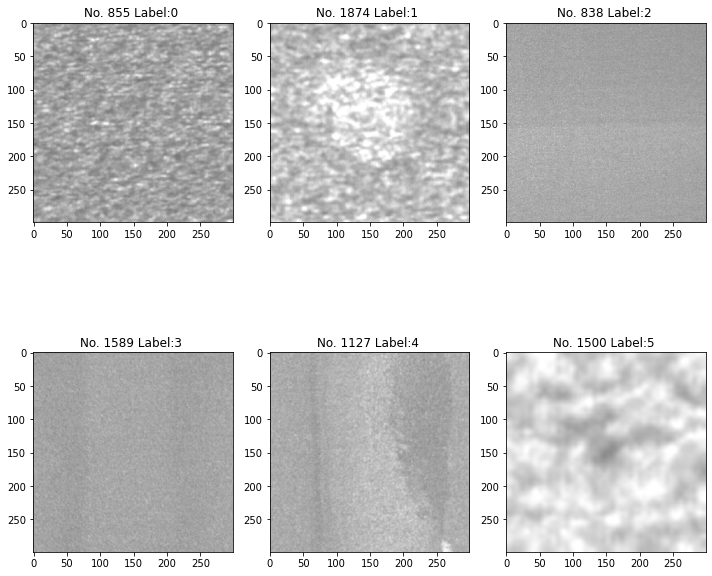

In [9]:
import random
curclass = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        curclass += 1
        curclass %= 6
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

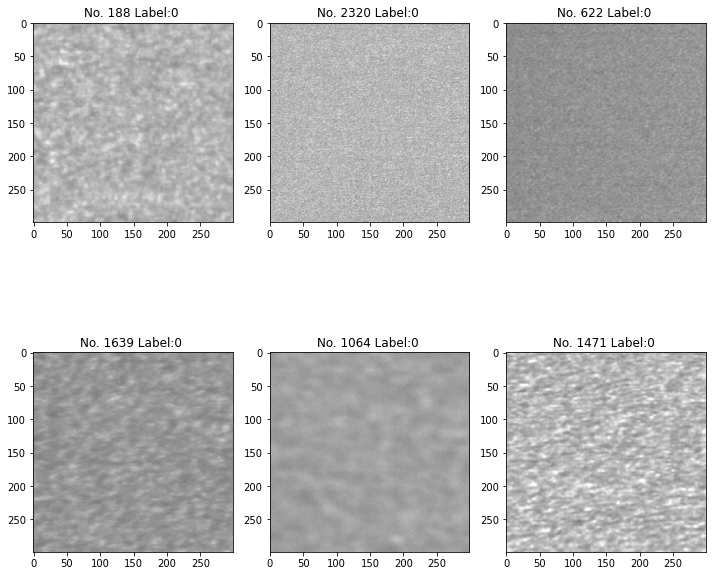

In [10]:
# Class 0-normal
import random
curclass = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

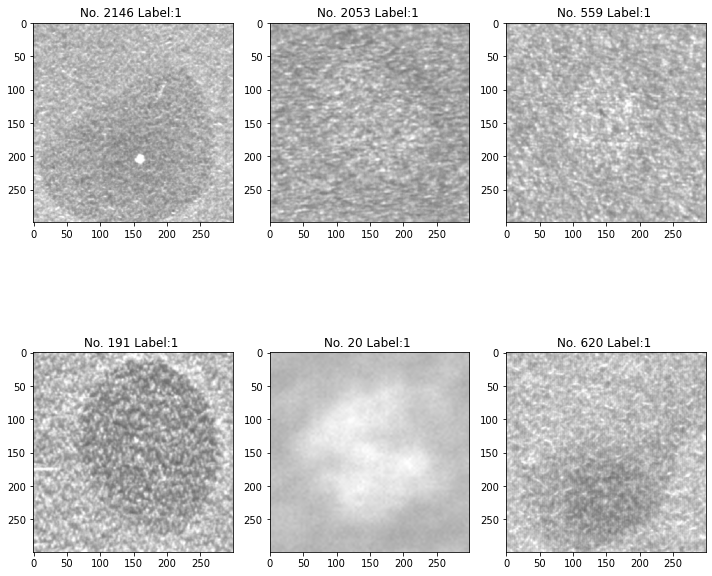

In [11]:
# Class 1-void
import random
curclass = 1
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

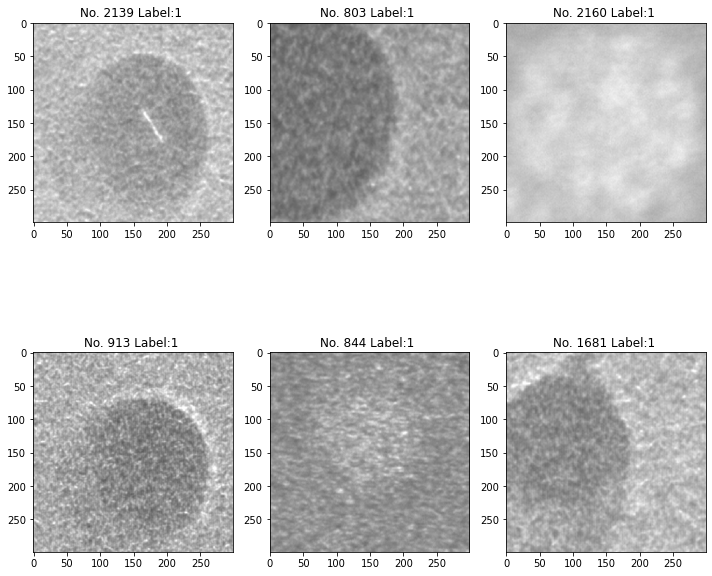

In [12]:
# Class 2-horizontal defect
import random
curclass = 1
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

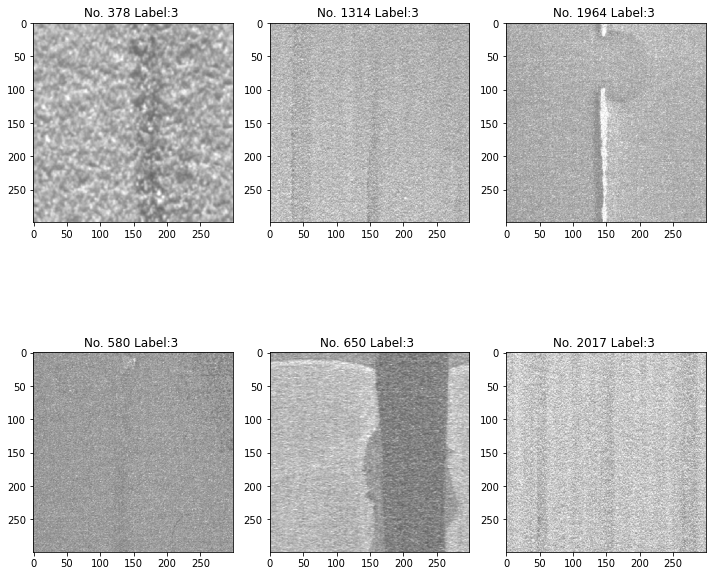

In [15]:
# Class 3-vertical defect
import random
curclass = 3
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

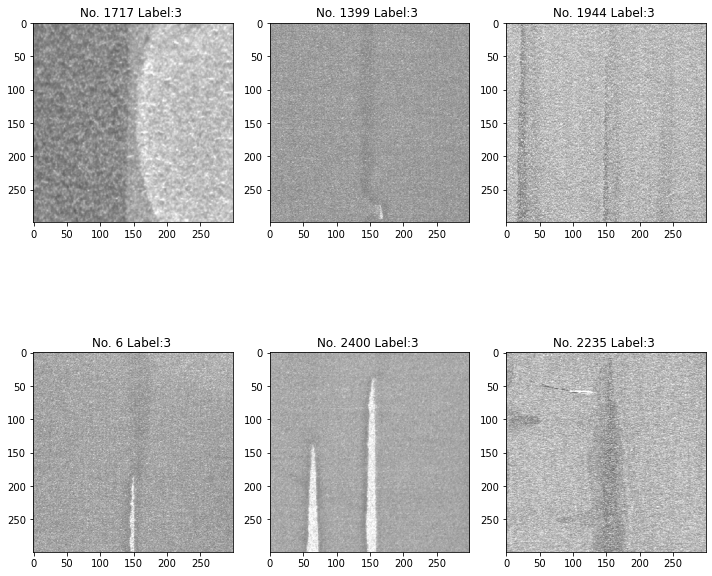

In [14]:
# Class 4-edge defect
import random
curclass = 3
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

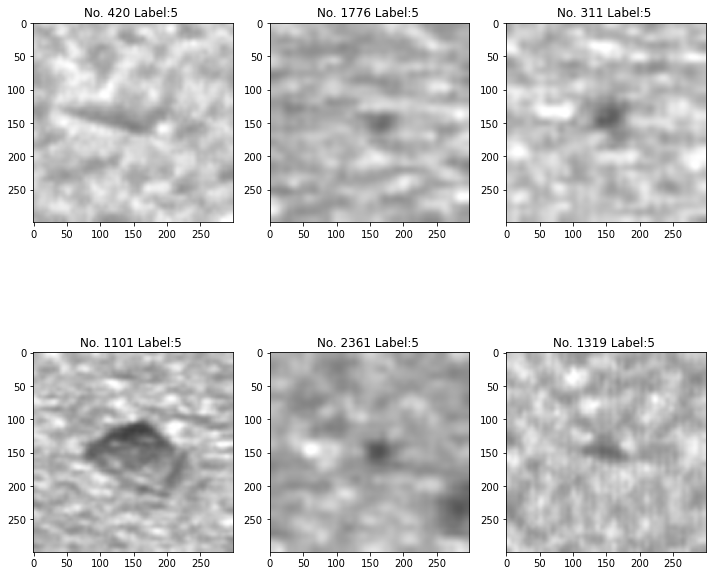

In [13]:
# Class 5-particle
import random
curclass = 5
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        sel=random.randint(0,train_num)
        while train_labels[sel]!=curclass:
          sel +=1
          if sel == train_num -1:
            sel = 0
        #sel=random.randint(0,train_num)
        ax[i,j].imshow(train_images[sel], cmap='gray')
        ax[i,j].set_title('No. {} Label:{} '.format(sel, train_labels[sel]))       
plt.tight_layout()

## Step 6: Show statistics of training images in the 6 classes

In [16]:
import numpy as np
labels, counts = np.unique(train_labels, return_counts=True)
print(labels, counts)

[0 1 2 3 4 5] [674 492 100 378 240 644]


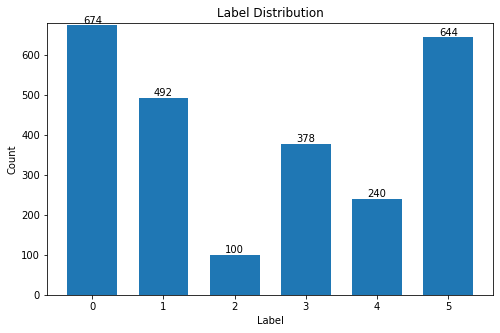

In [17]:
fig = plt.figure(figsize=(8, 5))
plt.bar(labels, counts, width=0.7, align='center')
plt.title("Label Distribution")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.ylim(0, 680)

for a, b in zip(labels, counts):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=10)
plt.show()

# (B) TensorFlow 2.0 

## Step 7: Tensorflow basic model training
定義(define), 編譯(compile), 訓練(fit), 評估(evaluate), 預測(prediction）

In [18]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.2.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [20]:
x_train = x_train[..., tf.newaxis]
x_test  = x_test[..., tf.newaxis]
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01) #lr =0.01
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [24]:
model.compile(optimizer=opt, loss=loss_fn, metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9895 - accuracy: 0.5413
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6129 - accuracy: 0.8581
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5823 - accuracy: 0.8846
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5683 - accuracy: 0.8969
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5583 - accuracy: 0.9068


In [26]:
model.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 1.5237 - accuracy: 0.9398


[1.5236927270889282, 0.9398000240325928]

In [29]:
y_predicts = model.predict(x_test)
y_predicts[0]

array([1.25014776e-17, 4.96189521e-22, 1.38694313e-16, 3.04427470e-14,
       3.81542486e-19, 2.74086063e-19, 2.85150199e-26, 1.00000000e+00,
       1.87172335e-19, 1.11967727e-12], dtype=float32)

In [31]:
predicts = np.argmax(y_predicts,axis=1)
print(predicts[:10])

[7 2 1 0 4 1 4 9 6 9]


In [32]:
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]


## Step 8: Keras Applications Models
<img src="https://miro.medium.com/max/1571/1*XB4SlSGxGKFQbIBoil0aDg.png" alt="Pre-train models" width="500">

Pre-train models of tf.Keras includes Xception、VGG16、VGG19、ResNet50、InceptionV3、InceptionResNetV2、MobileNet、DenseNet、NASNet、MobileNetV2

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
model = InceptionV3(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
model = Xception(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications.nasnet import preprocess_input
model = NASNetLarge(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
model = InceptionResNetV2(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
model = MobileNetV2(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
model = ResNet50V2(include_top = True, input_shape=(299,299,3), weights=None, classes=num_classes)

## Step 9: Keras Applications preprocess_input

In [41]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
x = image.img_to_array(train_images[0])
img_array = preprocess_input(x, mode = 'tf' )
print(img_array[0 , 0 , 0])


0.3411765


In [42]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
x = image.img_to_array(train_images[0])
img_array = preprocess_input(x, mode = 'torch' )
print(img_array[0 , 0 , 0])

0.810429


In [40]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
x = image.img_to_array(train_images[0])
img_array = preprocess_input(x, mode = 'caffe' )
print(img_array[0 , 0 , 0])

67.061


## Step 10: Tranfer learning
<img src="https://miro.medium.com/max/1280/0*L8egayRvFZOAmvqc.png" alt="Pre-train models" width="500">

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [ ]:
#the InceptionV3 model 
num_classes = 6
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(include_top = False, input_shape=(299,299,3), weights='imagenet', classes=num_classes)
base_model.summary()

In [51]:
base_model.trainable = False
last_layer = base_model.output
last_layer=Flatten()(last_layer)
last_layer=Dropout(0.3)(last_layer)
out = Dense(num_classes, activation='softmax', name='softmax')(last_layer)
custom_model = Model(base_model.input, out)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 12294     
Total params: 21,815,078
Trainable params: 12,294
Non-trainable params: 21,802,784
_________________________________________________________________
